In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [60]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("/Users/vidyanshsinha/Desktop/machine learning/magic+gamma+telescope/magic04.data",names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [63]:
df["class"]= (df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


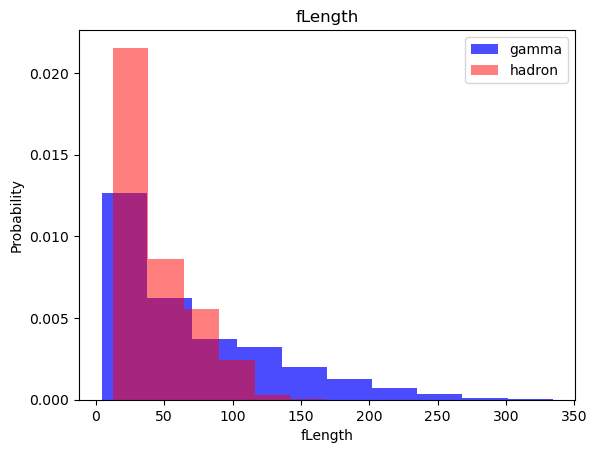

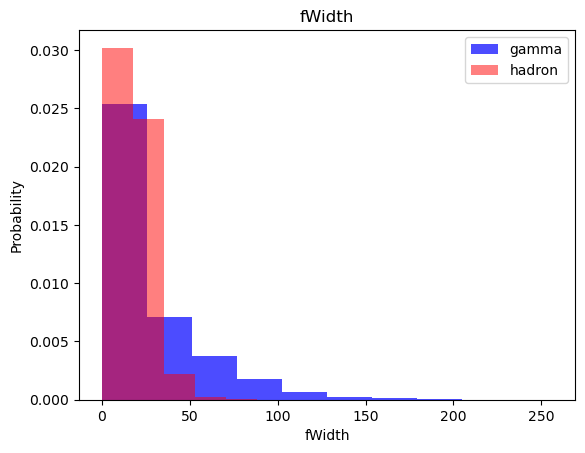

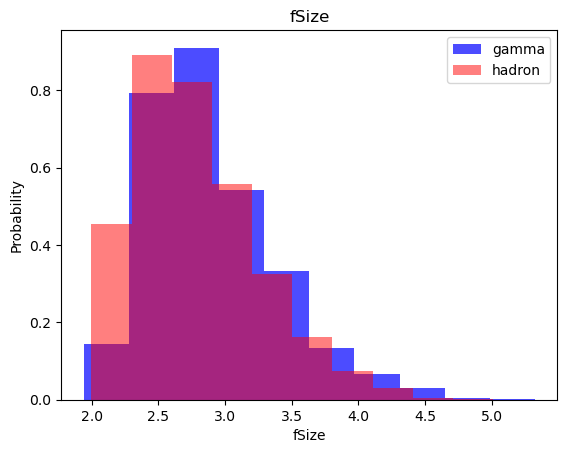

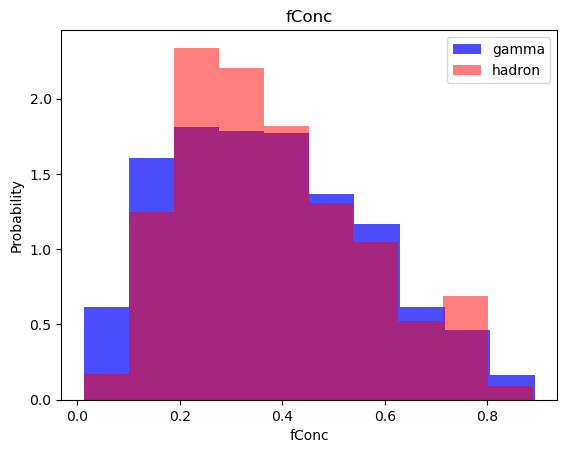

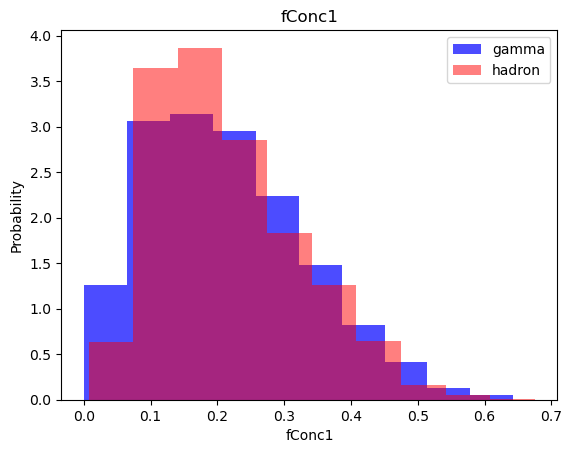

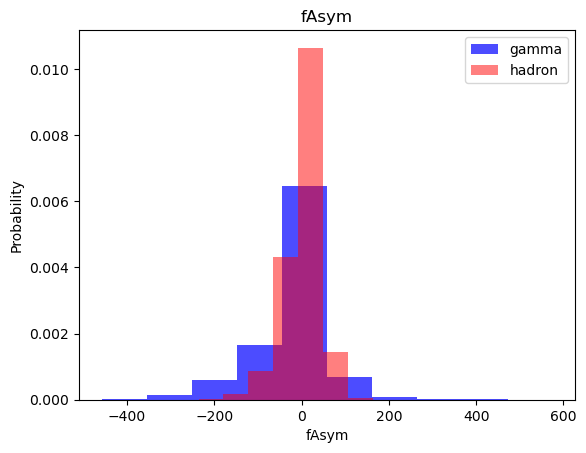

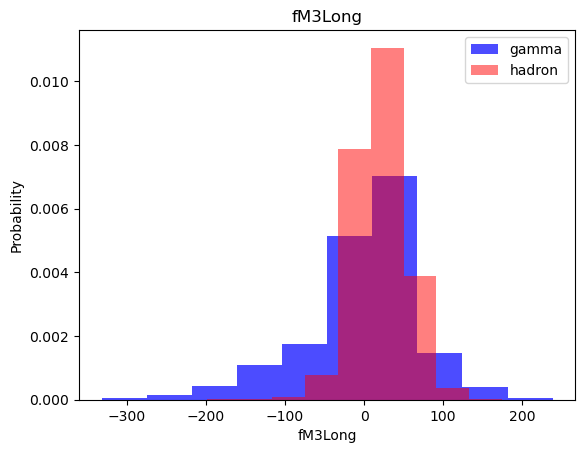

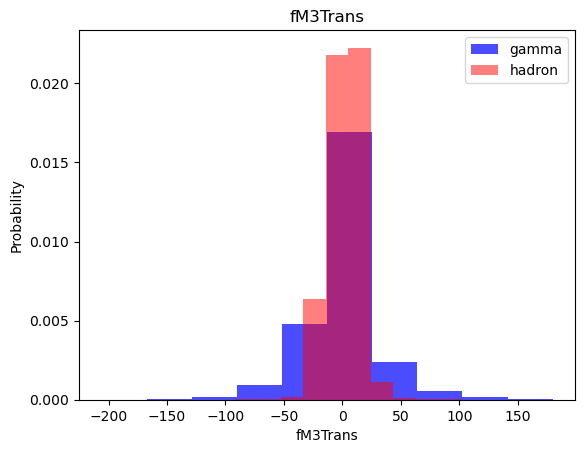

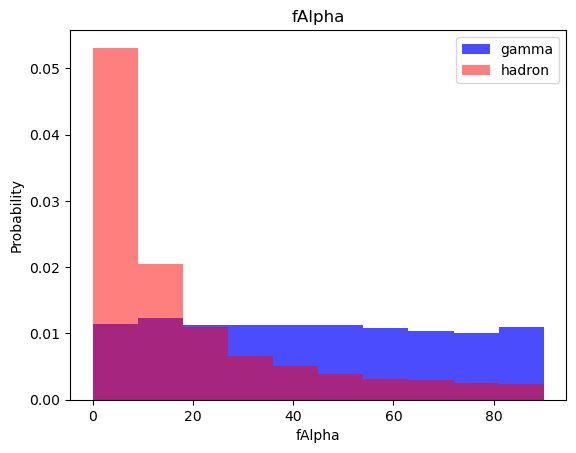

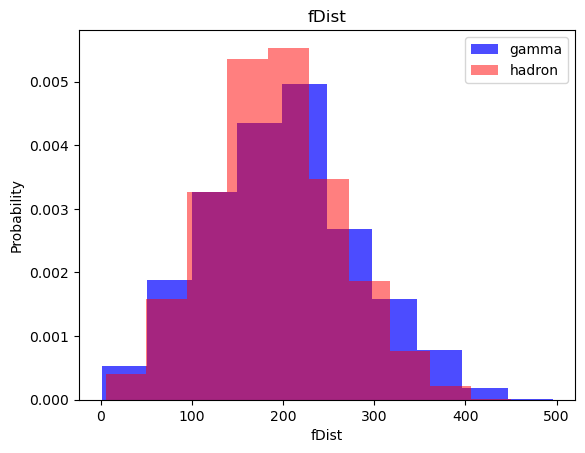

In [65]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 0][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 1][label], color='red', label='hadron', alpha=0.5, density=True) 
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Probability")
    plt.legend()  
    plt.show() 

In [103]:
train,valid,test= np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
print(type(train))

<class 'pandas.core.frame.DataFrame'>


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [107]:
def scale_dataset(dataframe, oversample=False):
    cols = dataframe.columns  # Get column names
    x = dataframe[cols[:-1]].values  # Features (all columns except last)
    y = dataframe[cols[-1]].values  # Target (last column)
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Scale features (not labels)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)  # Handle class imbalance

    data = np.hstack((x, y.reshape(-1, 1)))  # Ensure `y` is 2D before stacking

    return data, x, y

In [109]:
train_scaled, x_train, y_train = scale_dataset(train, oversample=True)
valid_scaled, x_valid, y_valid = scale_dataset(valid, oversample=False)
test_scaled, x_test, y_test = scale_dataset(test, oversample=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [113]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [115]:
y_pred=knn_model.predict(x_test)

In [117]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [119]:
y_test


array([0, 0, 0, ..., 1, 1, 0])

In [121]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1330
           1       0.87      0.85      0.86      2474

    accuracy                           0.82      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [123]:
from sklearn.naive_bayes import GaussianNB

In [125]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [127]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.41      0.67      0.51       833
           1       0.89      0.72      0.80      2971

    accuracy                           0.71      3804
   macro avg       0.65      0.70      0.65      3804
weighted avg       0.78      0.71      0.73      3804



In [91]:
from sklearn.linear_model import LogisticRegression

In [129]:
lb_model=LogisticRegression()
lb_model.fit(x_train,y_train)

LogisticRegression()

In [133]:
y_pred=lb_model.predict(x_test)

In [135]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1436
           1       0.82      0.84      0.83      2368

    accuracy                           0.78      3804
   macro avg       0.77      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

